In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/vegetable_price.csv")

In [3]:
missing = df.isnull().values.any() 

In [4]:
if missing == True:
    df = df.ffill().bfill()
    print("null values filled")
else:
     print("no null values encountered")

no null values encountered


In [5]:
label = preprocessing.LabelEncoder() 

In [6]:
object_col = df.select_dtypes(include=['object']).columns

In [7]:
for name in object_col:
    df[name] = label.fit_transform(df[name]) 

In [8]:
X = df.iloc[:,:-1]
y = df[df.columns[-1]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

In [10]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 18.99it/s]


In [11]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.71,0.76,25.94,0.04
ExtraTreeRegressor,0.71,0.75,26.03,0.01
AdaBoostRegressor,0.70,0.75,26.44,0.06
XGBRegressor,0.68,0.74,26.98,0.78
DecisionTreeRegressor,0.64,0.70,28.79,0.01
ExtraTreesRegressor,0.53,0.61,32.91,0.07
BaggingRegressor,0.47,0.56,34.79,0.02
RandomForestRegressor,0.47,0.56,34.87,0.14
LGBMRegressor,0.16,0.30,44.01,0.03


In [13]:
plot_data = pd.DataFrame(models)

In [14]:
plot_data = plot_data.reset_index()

In [15]:
plot_data

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,GradientBoostingRegressor,0.71,0.76,25.94,0.04
1,ExtraTreeRegressor,0.71,0.75,26.03,0.01
2,AdaBoostRegressor,0.70,0.75,26.44,0.06
3,XGBRegressor,0.68,0.74,26.98,0.78
4,DecisionTreeRegressor,0.64,0.70,28.79,0.01
5,ExtraTreesRegressor,0.53,0.61,32.91,0.07
6,BaggingRegressor,0.47,0.56,34.79,0.02
7,RandomForestRegressor,0.47,0.56,34.87,0.14
8,LGBMRegressor,0.16,0.30,44.01,0.03
9,HistGradientBoostingRegressor,0.15,0.29,44.21,0.22


In [16]:
plot_data.columns

Index(['Model', 'Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')

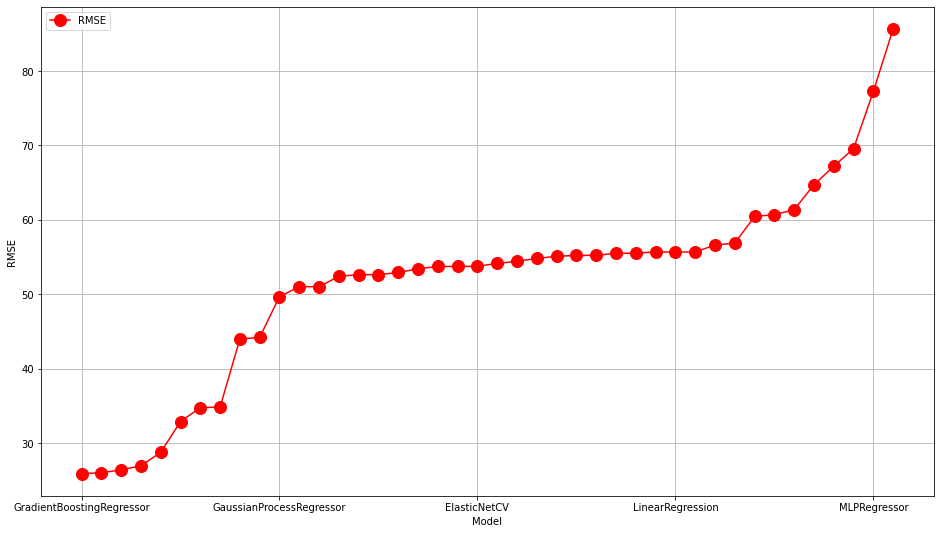

In [21]:
plt.rcParams["figure.figsize"] =[16,9]
plot_data.plot(x="Model",y="RMSE",color="Red",kind="line",marker='o',markersize=12)
plt.xlabel("Model")
plt.ylabel('RMSE')
plt.grid()
plt.show()